# Movie Similarity Distribution from the DOC2VEC model

In [1]:
import pandas as pd
import numpy as np

In [14]:
from gensim.models.doc2vec import Doc2Vec
model = Doc2Vec.load('/Users/dbikiel/PycharmProjects/Insight/models/model_doc2vec_20120123')

In [15]:
model.docvecs.similarity(0,1)

0.22115107

# Lets calculate the distribution of similarity between movies

In [16]:
import random
%matplotlib inline
import matplotlib.pyplot as plt

I will compute the similarity of 1M pairs of movies

In [98]:
n = 1000000
#sims = [model.docvecs.similarity(i,j) for i,j in (np.random.choice(range(62423), size = 2, replace = False) for _ in range(n))]
sims = [model.docvecs.similarity(i,j) for i,j in np.random.choice(range(62423),size = [n,2])]

In [99]:
sims = pd.DataFrame(sims)
sims.columns = ['Cosine Similarity']

In [113]:
sims = sims[~ (sims['Cosine Similarity'] == 1)]
sims.to_csv('Cosine Similarity 1M.csv')

In [114]:
import seaborn as sns
sns.set();

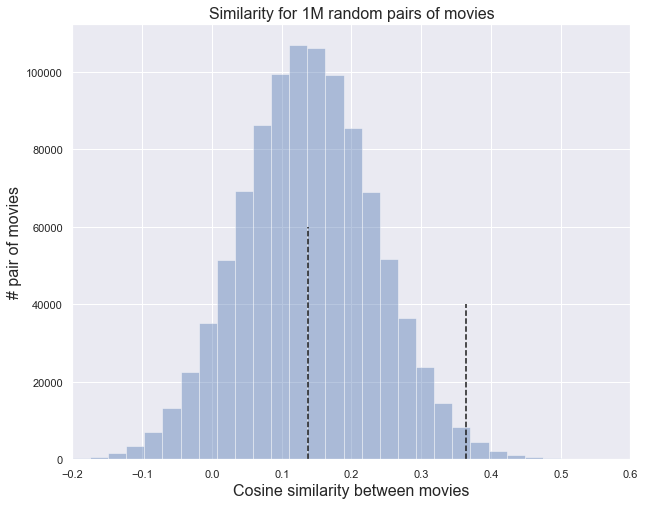

In [147]:
plt.figure(figsize=(10, 8))
sns.distplot(sims, kde= False, norm_hist=False)
plt.xlabel('Cosine similarity between movies', FontSize = 16)
plt.ylabel('# pair of movies', FontSize = 16)
plt.xlim([-0.2,0.6])
plt.title('Similarity for 1M random pairs of movies', FontSize = 16)
plt.vlines(np.quantile(sims,[0.5]), 0, 60000, LineStyle = 'dashed')
#plt.hlines(60000, np.quantile(sims,[0.5]), 0.3, LineStyle = 'dashed')
plt.vlines(np.quantile(sims,[0.99]), 0, 40000, LineStyle = 'dashed')
plt.savefig('random similarity movies.png')